# Jamboree Case Study

## About Jamboree

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

## Problem Statement

- Help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. 
- Also help predict one's chances of admission given the rest of the variables.


## Data Set:

https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

## Column Profiling

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

## Identification of variables and data types:

In [ ]:
df = pd.read_csv('Jamboree_Admission.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## Analysing the basic metrics

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Null value analysis

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

We see that there are no null values and the data looks cleaning. No feature engineering/data cleaning as such nedded

In [ ]:
# Drop the serial number

In [ ]:
df.drop(['Serial No.'],axis=1,inplace = True)

## Exploratory Data Analysis

In [ ]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

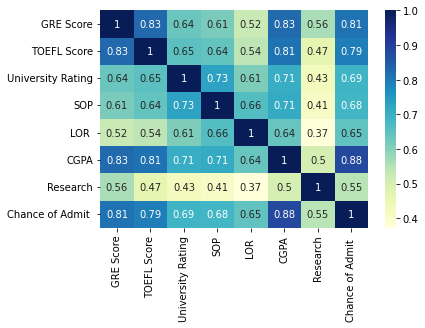

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

We see a high correlation amongst the following variables
- CGPA and Chances of Admit
- CGPA and GRE score
- CGPA and TOEFL score
- GRE score and TOEFL score
- GRE score and Chances of Admit
- TOEFL score and Chances of Admit

From the correlation score, Chances of Admit have a variability with other parameters in the following order:
(Chances of Admit depend on)
- CGPA
- GRE Score
- TOEFL Score
- University rating
- SOP
- LOR
- Research


### Chances of Admit v/s Research

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

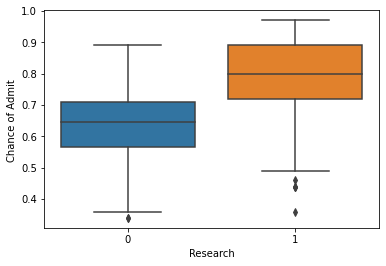

In [ ]:
sns.boxplot(data=df,x='Research',y='Chance of Admit ')

### Chances of Admit v/s CGPA

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

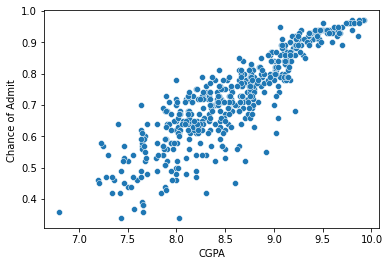

In [ ]:
sns.scatterplot(data=df,x='CGPA',y='Chance of Admit ')

Chances of Admit are usually on a rise with CGPA

### Chances of Admit v/s GRE

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

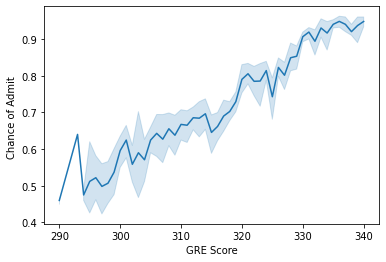

In [ ]:
sns.lineplot(data=df,x='GRE Score',y='Chance of Admit ')

Chances of Admit are usually on a rise with GRE score

### Chances of Admit v/s TOEFL

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

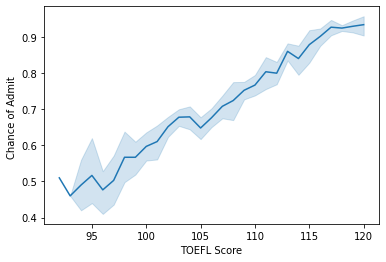

In [ ]:
sns.lineplot(data=df,x='TOEFL Score',y='Chance of Admit ')

Chances of Admit are usually on a rise with TOEFL score

# Linear Regression

## Multicollinearity check by VIF score 

One of the assumptions for Linear regression is that the input variables are highly independent. Hence we check the VIF score to check for correlation in the input variables

In [ ]:
X = df[df.columns.drop('Chance of Admit ')]
Y = df["Chance of Admit "]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X)

,variables,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


Drop TOEFL score and CGPA and check for VIP again

In [ ]:
X = X[X.columns.drop(['TOEFL Score','CGPA'])]

In [ ]:
calc_vif(X)

,variables,VIF
0,GRE Score,19.853847
1,University Rating,19.716492
2,SOP,32.836036
3,LOR,29.417321
4,Research,2.849524


We still a high correlation(> 5) among all input variables except the Research variable. Hence retain the research paramter as the only variable

In [ ]:
X = X[X.columns.drop(['GRE Score','University Rating','SOP','LOR '])]

## Linear Regression Model - Model fitting

In [ ]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(Y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           3.60e-40
Time:                        17:57:33   Log-Likelihood:                 358.48
No. Observations:                 500   AIC:                            -713.0
Df Residuals:                     498   BIC:                            -704.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6349      0.008     79.554      0.000       0.619       0.651
Research       0.1551      0.011     14.539      0.000       0.134       0.176
==============================================================================
Omnibus:                       27.731   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.129
Skew:                          -0.609   Prob(JB):                     1.74e-07
Kurtosis:                       3.094   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check if residual of means is Zero

In [ ]:
lin_reg.resid.mean()

-8.242295734817163e-16

Mean of residuals is very small. Approximately 0 - Condition passed

### Linearity of variables (no pattern in residual plot)

PS: !IMPORTANT NOTE! 
CREDITS for linearity_test() function used below. 

Referred to https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0

Had questions on content covered in class, and a re-class has been agreed upon.However, we got the assignment before the re-class.
Hence the external references!

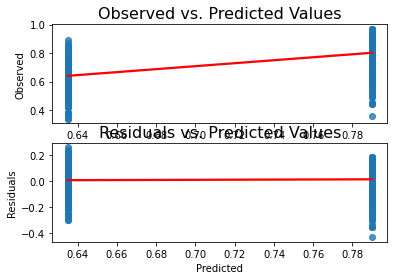

In [ ]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(2,1)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, Y)  

#### Use line plot to check linearity in data as well

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

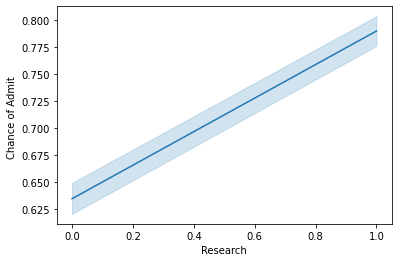

In [ ]:
sns.lineplot(data=df,x='Research',y='Chance of Admit ')

We see a linear relationship between the research data and chances of admit - Linearity relationship is satisfied

### Test for Homoscedasticity

The null hypothesis (H0): Homoscedasticity is present.

The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

In [ ]:
#perform Bresuch-Pagan test
import statsmodels.stats.diagnostic as smd

test = smd.het_breuschpagan(lin_reg.resid, lin_reg.model.exog)
test

(2.1327400035535127,
 0.14418282066263327,
 2.133308628844618,
 0.1447599487446958)

p-value of f-statistic is 0.144 - indicating we cannot reject the null Hypothesis. This implies Homosedacity exists

### Normality of residuals

In [ ]:
from scipy.stats import shapiro
#null - series is normal
#alter- not normal
w, p_value=shapiro(lin_reg.resid )

In [ ]:
p_value

2.759689188280845e-08

p_value is very small, indicating that we cannot accept the null hypotheis. The reidual series is not normal

In [ ]:
# Take log-normal
w, p_value_log = shapiro(np.log(lin_reg.resid ))
p_value_log

C:\Users\SToleti\AppData\Roaming\Python\Python37\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1.0

After applying log transformation, we conclude that the input series is normal

### Model Evaluation

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(X,Y, test_size=0.1,random_state = 1)

print("Traning set shape X:", x_train.shape)
print("Traning set shape Y:", y_train.shape)
print("Test set shape X:", x_test.shape)
print("Test set shape Y:", y_test.shape)



Traning set shape X: (450, 1)
Traning set shape Y: (450,)
Test set shape X: (50, 1)
Test set shape Y: (50,)


In [ ]:
from sklearn.linear_model import LinearRegression

final_model = LinearRegression()
final_model.fit(x_train,y_train)

final_model.score(x_train,y_train)

0.30360827040497884

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
y_pred = final_model.predict(x_test)
print("Mean absolute error:", mean_absolute_error(y_test, y_pred) )
print("Mean squared error:",mean_squared_error(y_test, y_pred) )
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test, y_pred)) )
print("Mean absolute percentage error:", mean_absolute_percentage_error(y_test,y_pred))


Mean absolute error: 0.08654759454643741
Mean squared error: 0.012744041729971334
Root Mean squared error: 0.11288951116012211
Mean absolute percentage error: 0.13207940406443647


## Business Insights

With an error rate of 13% we can predict if a student can be accepted into college based on his research background

## Recommendations

Recommend the candidates with research background for admission into college. In case the research criteria is not met, then look for the GRE score. GRE score > 317